In [10]:
%pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
import pathlib

data_dir = pathlib.Path('data/')
no_oil = list(data_dir.glob('0/*'))
oil = list(data_dir.glob('1/*'))

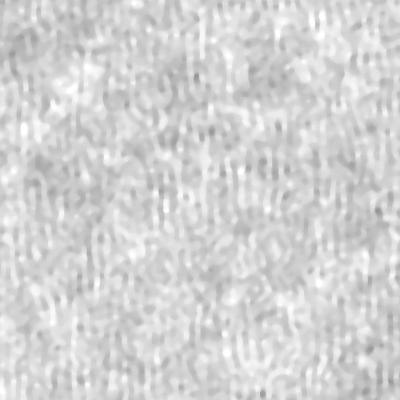

In [22]:
PIL.Image.open(str(no_oil[0]))

In [23]:
len(no_oil)

3725

In [24]:
len(oil)

1905

In [40]:
batch_size = 32
img_height = 400
img_width = 400

Split into training and validation sets

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5630 files belonging to 2 classes.
Using 4504 files for training.


In [49]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5630 files belonging to 2 classes.
Using 1126 files for validation.


In [50]:
class_names = train_ds.class_names

In [51]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [52]:
# normalization_layer = layers.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]

In [53]:
# print(np.min(first_image), np.max(first_image))

In [54]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 400, 400, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 200, 200, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 200, 200, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,503,970 (78.22 MB)

 Trainable params: 20,503,970 (78.22 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
epochs = 10

In [58]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 84s 579ms/step - accuracy: 0.6605 - loss: 0.7926 - val_accuracy: 0.6572 - val_loss: 0.6109
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 583ms/step - accuracy: 0.6712 - loss: 0.5778 - val_accuracy: 0.6927 - val_loss: 0.5800
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 567ms/step - accuracy: 0.6960 - loss: 0.5497 - val_accuracy: 0.6545 - val_loss: 0.6179
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 566ms/step - accuracy: 0.7189 - loss: 0.5332 - val_accuracy: 0.7362 - val_loss: 0.6022
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 569ms/step - accuracy: 0.7533 - loss: 0.4845 - val_accuracy: 0.7318 - val_loss: 0.6744
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 81s 572ms/step - accuracy: 0.7802 - loss: 0.4476 - val_accuracy: 0.7167 - val_loss: 0.7345
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 568ms/step - accuracy: 0.8115 - loss: 0.3839 - val_accuracy: 0.7291 - val_loss: 0.8316
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 584ms/step - accuracy: 0.8186 - loss: 0

# Training results

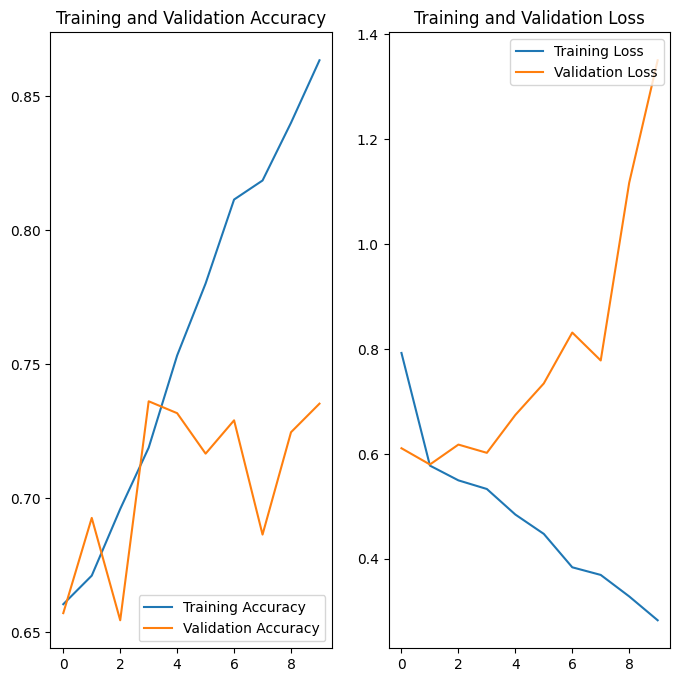

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data augmentation

In [61]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

2025-10-20 10:19:00.497756: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


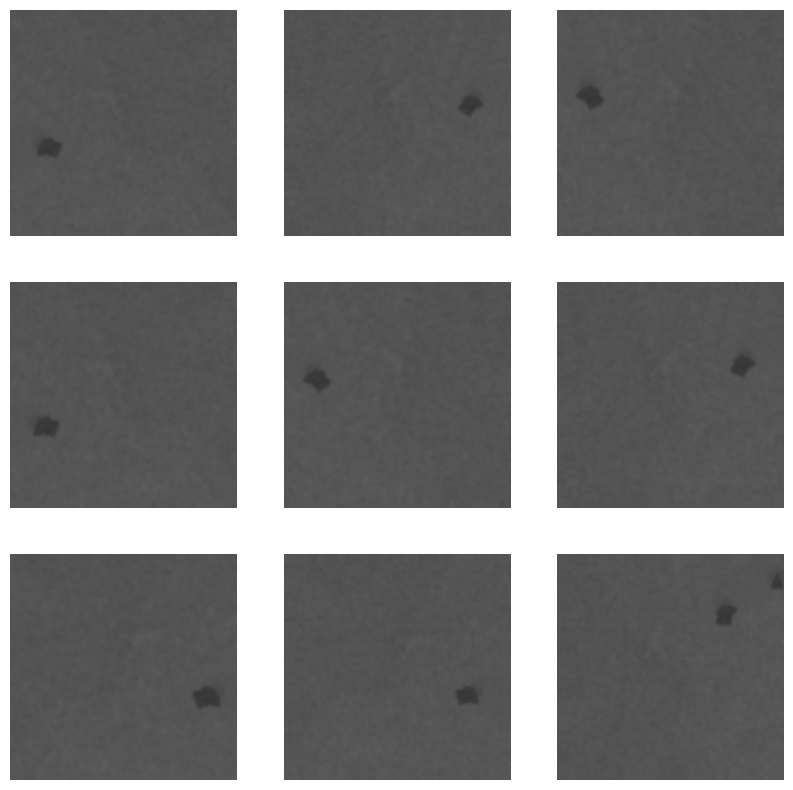

In [62]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Add dropout

In [63]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 400, 400, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 200, 200, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 200, 200, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,503,970 (78.22 MB)

 Trainable params: 20,503,970 (78.22 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 629ms/step - accuracy: 0.6632 - loss: 0.7784 - val_accuracy: 0.6847 - val_loss: 0.5910
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 88s 622ms/step - accuracy: 0.6878 - loss: 0.5975 - val_accuracy: 0.6616 - val_loss: 0.5955
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 87s 620ms/step - accuracy: 0.6945 - loss: 0.5871 - val_accuracy: 0.6643 - val_loss: 0.5997
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 88s 624ms/step - accuracy: 0.7049 - loss: 0.5760 - val_accuracy: 0.7336 - val_loss: 0.5760
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 91s 647ms/step - accuracy: 0.7045 - loss: 0.5643 - val_accuracy: 0.7194 - val_loss: 0.5859
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 93s 662ms/step - accuracy: 0.7218 - loss: 0.5502 - val_accuracy: 0.7478 - val_loss: 0.5905
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 94s 664ms/step - accuracy: 0.7236 - loss: 0.5366 - val_accuracy: 0.7460 - val_loss: 0.5967
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 88s 623ms/step - accuracy: 0.7362 - loss: 0

# Results #2

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()